<a href="https://colab.research.google.com/github/bolkv/2024S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1. Linear SVM vs Kernel SVM

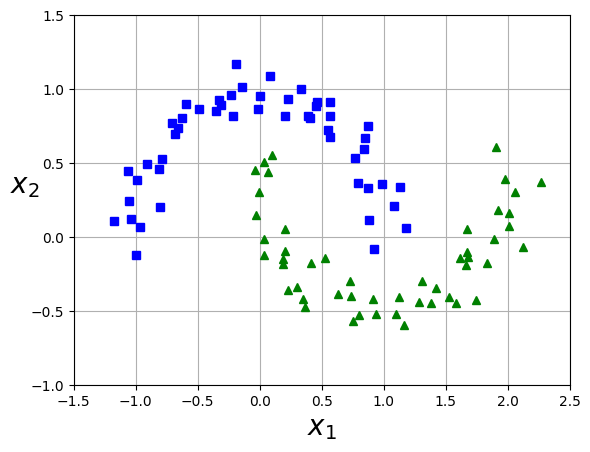

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#Toy example 생성
X, y = make_moons(n_samples=100,
 noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [2]:
# decision boundary 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

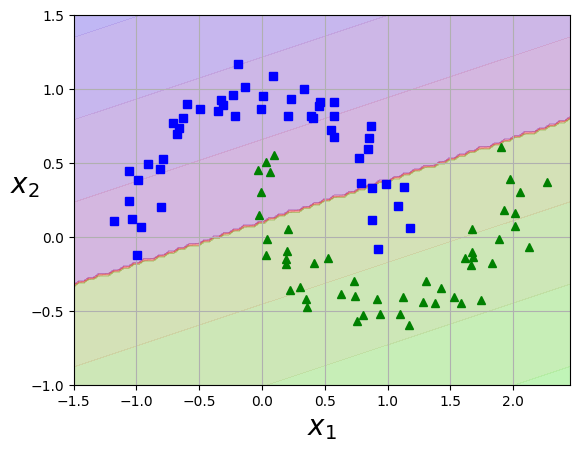

In [3]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1)
linear_svc.fit(X,y)
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

## 문제 1-1 Kernel SVM 학습

Kernel SVM을 아래의 조건에 맞게 학습하고 시각화를 진행하시오.

\

---
*조건*

 1. `rbf` Kernel을 사용하여 주어진 X를 `100% 정확도`로 예측하는 하이퍼파라미터를 찾으시오.
 2. `Linear SVM`과 `Kernel SVM`의 decision boundary를 시각화하시오.
 3. subplot을 활용하여 기존 `Linear SVM`와 비교할 수 있도록 시각화하시오.
 ---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

5


Text(0.5, 1.0, 'Kernel')

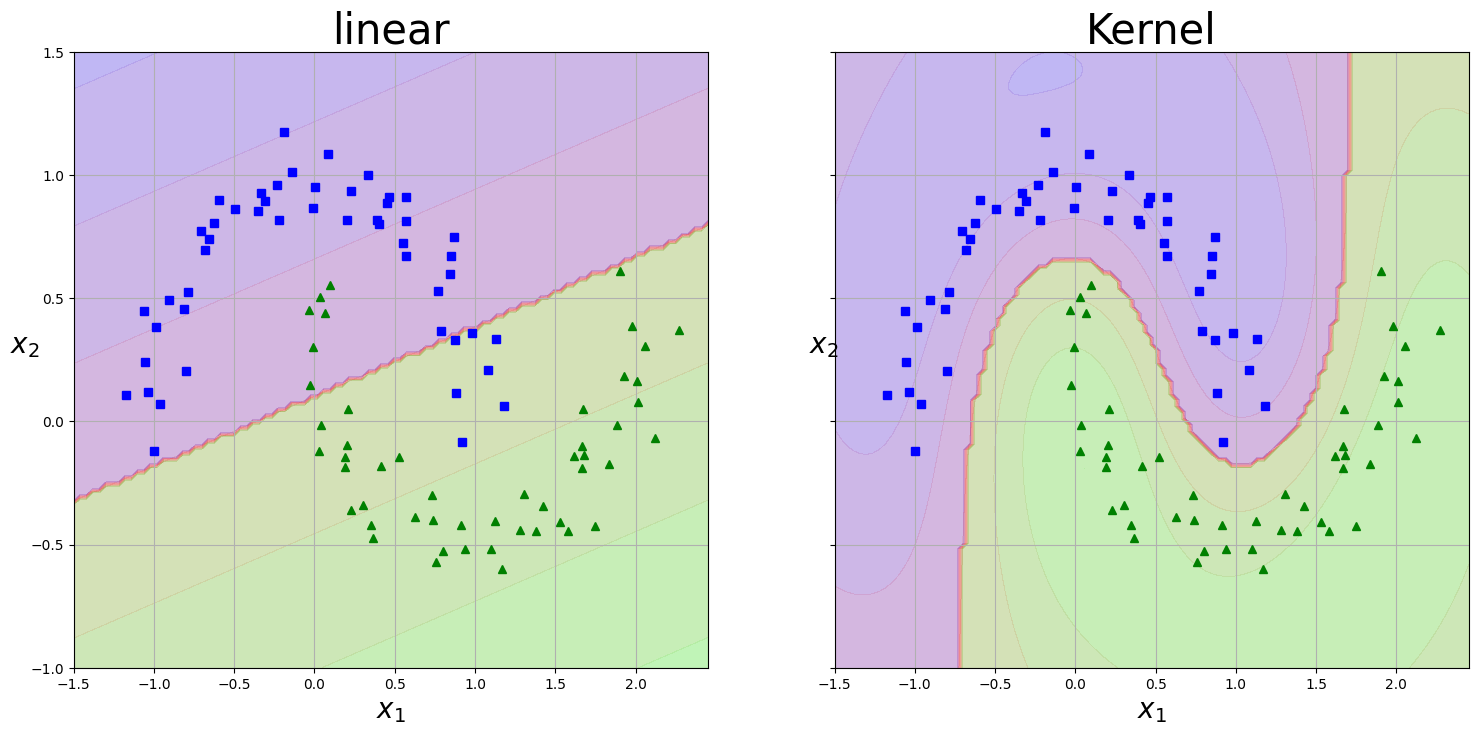

In [ ]:
from sklearn.svm import SVC

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("linear", fontsize=30)

#####################문제1-1###############################
#C의 list
C = [0.5,1,2,5,10,100,1000]

#각 C에 대해 검사
for c in C:
  answer_c = c
  rbf_svc = SVC(kernel='rbf',C = c)
  #훈련
  rbf_svc.fit(X,y)
  accuracy = rbf_svc.score(X,y)
  #100% 정확도로 예측하는 하이퍼파라미터
  if(accuracy == 1):
    break

print(answer_c)
plt.sca(axes[1])
plot_predictions(rbf_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("Kernel", fontsize=30)

##########################

# 문제 1-2 Kernel SVM의 장점

* **해당 데이터에서 Linear SVM보다 Kernel SVM이 잘 동작할 수 있는 이유를 서술하시오.**
* **데이터의 분포와 모델의 특징을 연결지어서 설명하시오.**

**정답** : 문제에서와 같이 데이터가 선형적으로 구분되지 않는 분포를 보이는 경우에는 Kernel SVM이 더 나은 성능을 보일 수 있다. Kernel SVM은 커널 함수를 사용하여 데이터를 고차원 특징 공간으로 매핑하여 선형적으로 구분되도록 만들 수 있다. 이를 통해 비선형 결정 경계를 찾게된다. 반면에 Linear SVM은 선형 결정 경계만 찾을 수 있기 때문에 비선형 데이터에 대해서는 성능이 제한될 것이다.

## 데이터 코드

# 문제 2. Validation

- `Test set` **<font color=red> 은 문제 2-3에서만 사용해야 합니다. </font>**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dir을 바꿔주세요.
# digits_clean 데이터를 사용해야 합니다.

data = pd.read_csv('/content/digits_clean.csv').to_numpy()
labels = pd.read_csv('/content/digits_target.csv').to_numpy().reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

## 문제 2-1

 - 아래 코드의 방식으로 평가 시 발생하는 문제를 서술하시오.
 - `Model fitting` 관점에서 서술
 - Validation set의 목적

In [5]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
rbf_kernel_svm_clf.fit(train_X, train_y)
X_val, y_val = train_X, train_y
print(f"Validation score : {rbf_kernel_svm_clf.score(X_val, y_val)}")

Validation score : 1.0


#### 정답 :
Model fitting 관점에서 모델을 평가할 때는 훈련에 사용되지 않은 새로운 데이터를 사용해야한다. 그렇지 않으면 모델이 훈련 데이터에만 잘 동작하고 실제 상황에서는 훈련 데이터 셋에 overfitting 되어 성능이 떨어질 수 있다. 위 코드에서는 훈련 데이터train_X 와 train_y를 검증 데이터로 사용하여 모델을 평가하고 있다. 모델을 훈련시에 사용된 데이터와 동일한 데이터를 검증에 사용기때문에,  모델의 성능을 과대평가할 수 있는 가능성이 있다.

Validation set의 목적: Validation set은 모델의 성능을 평가하고 하이퍼파라미터 튜닝을 위해 사용된다. 이로부터 하이퍼파라미터 값인 C와 gamma값을 튜닝할 수 있다. C값이 너무 크면 훈련 데이터 셋에 overfitting 되어 성능이 떨어질 수 있는 등, 이러한 것들을 잡고 튜닝한다.훈련 데이터와 검증 데이터는 서로 독립적이어야 한다. 모델이 훈련 데이터에서 학습한 패턴을 검증하기 위해 Validation set을 사용한다.

따라서 위 코드에서는 훈련 데이터를 검증 데이터로 사용하여 모델을 평가하고 있기 때문에 모델의 실제 성능을 정확하게 평가하지 못하고, 과적합된 모델을 만들 가능성이 높다. 검증 데이터는 훈련 데이터와 독립적이어야 하며, 테스트 데이터와는 분리되어야 한다.


##문제 2-2 K-fold Cross validation

5-fold Cross Validation (CV) 을 사용하여 모델을 평가하시오.

\

---
*조건*
1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. Cross validation score의 분산과 평균을 출력하시오.
3. Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter를 찾고 전체 train set으로 학습하시오.
4. `Test set`에 대해서 `문제 2-1`에서 학습한 모델과 최종 성능에 대해서 비교하시오 (출력만 하시면 됩니다).

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [6]:
from sklearn.model_selection import KFold


#####################문제2-2###############################
gamma_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
C_values = [0.1, 1, 2, 10]

#최대 score값
max_score=0

#최적 Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter gamma, c찾기
for g in gamma_values:
    for c in C_values:
        scores = []
        #K-Fold 수행
        kfold = KFold(n_splits=5)
        for train_index, val_index in kfold.split(train_X):
            X_train_fold, X_val_fold = train_X[train_index], train_X[val_index]
            y_train_fold, y_val_fold = train_y[train_index], train_y[val_index]
            kernel_svm_clf = SVC(kernel='rbf', gamma=g, C=c)
            kernel_svm_clf.fit(X_train_fold, y_train_fold)
            score = kernel_svm_clf.score(X_val_fold, y_val_fold)
            scores.append(score)

        #각 fold들의 score의 평균값
        mean_score = np.mean(scores)
        if mean_score >= 0.8:  # 평균 점수가 0.8 이상인지 확인
          if max_score < mean_score:
            gamma = g
            C = c
            max_score = mean_score
            cv_scores = scores


print("C :",c ,"gamma: ",gamma)

#평균 출력
print(f"평군 : {np.mean(cv_scores)}")

#분산 출력
print(f"분산 : {np.var(cv_scores)}")


final_svm = SVC(kernel='rbf', gamma=gamma, C=C)
final_svm.fit(train_X, train_y)
#########################################################

print(f"final_model 정확도 : {final_svm.score(test_X,test_y)}")
print(f"2-1 model 정확도 : {rbf_kernel_svm_clf.score(test_X,test_y)}")

C : 10 gamma:  0.0001
평군 : 0.9913043478260869
분산 : 0.0001739130434782612
final_model 정확도 : 0.9756944444444444
2-1 model 정확도 : 0.1076388888888889


# 문제 2-3 Stratified K-fold Cross validation

위에서 찾은 하이퍼파라미터로 Stratified K-fold Cross validation을 진행하면서 각 fold의 test y(class)의 분포를 histplot(혹은 barplot) 시각화하세요.

\

---
*조건*

1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. fold 별 y 분포 그래프의 경우, 주어진 subplot을 활용하세요.
3. (Stratified) Cross validation score의 분산과 평균을 출력하시오.

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [7]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

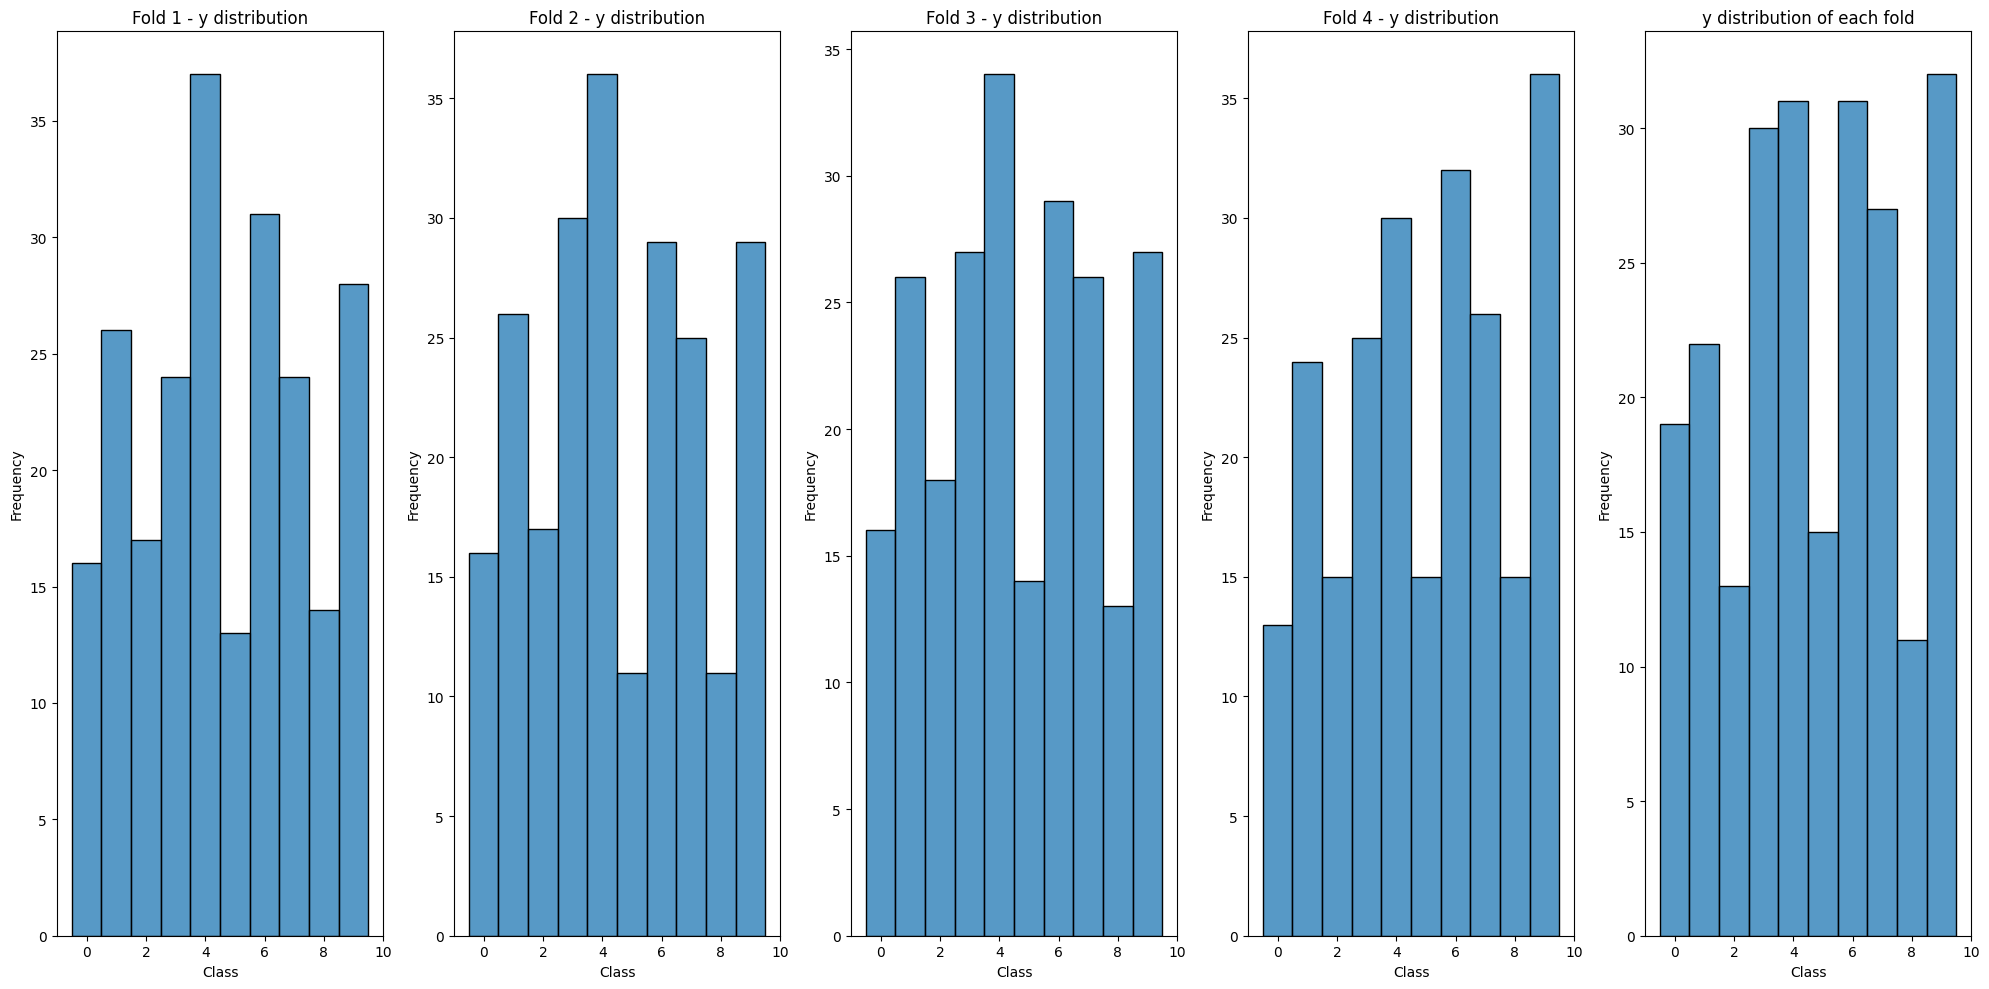

평균 : 0.9965517241379309
분산 : 4.756242568371006e-05


In [8]:


#####################문제2-3###############################
gamma = 0.0001
C = 10
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
scores = []

for train_index, test_index in skf.split(test_X, test_y):
    X_train_fold, X_test_fold = train_X[train_index], train_X[test_index]
    y_train_fold, y_test_fold = train_y[train_index], train_y[test_index]

    # 모델 학습
    kernel_svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)
    kernel_svm_clf.fit(X_train_fold, y_train_fold)

    # 예측
    score = final_svm.score(X_test_fold, y_test_fold)
    scores.append(score)

    # Fold 별 y 분포 시각화
    sns.histplot(y_train_fold, ax=axes[fold], bins=np.arange(11)-0.5)
    axes[fold].set_title(f"Fold {fold+1} - y distribution")
    axes[fold].set_xlabel("Class")
    axes[fold].set_ylabel("Frequency")
    fold = fold + 1


plt.tight_layout()
plt.title("y distribution of each fold")
plt.ylabel("Frequency")
plt.show()

#평균 출력
print(f"평균 : {np.mean(scores)}")

#분산 출력
print(f"분산 : {np.var(scores)}")

########################################################

# 문제 3. Grid search

- Scikit-learn 라이브러리를 이용하여 RandomForestClassifier의 최적의 파라미터를 찾는다.

- 아래 baseline 모델보다 높은 성능을 보이는 RandomForestClassifier 모델을 구축한다.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# dir 바꾸시기 바랍니다.
df = pd.read_csv('/content/Bank_clean.csv')


# 코드 건드리지 말 것
for i in df.columns: # label encoding
    if type(df[i].unique()[0]) == str :
      le = LabelEncoder()
      df[i] = le.fit_transform(df[i])

y = df['y']
X = df.drop(columns = 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 코드 건드리지 말 것
clf = RandomForestClassifier(n_estimators = 10) # Baseline Model
score=cross_val_score(clf, X_train, y_train, cv=5)
print(f"baseline cross validation score : {score.mean()}")

baseline = clf.fit(X_train,y_train)

baseline cross validation score : 0.8472178060413356



### 문제 3-1
주어진 링크를 참고하여 변경가능한 hyperparameter를 `param_grid`에 추가하세요.

그리고 추가한 hyperparameter에 대해 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고, Accuracy 기반 가장 높은 성능을 보이는 best hyperparameter를 확인하세요.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
*조건*

- **<font color=red>* Baseline보다 validation score(ACC)가 높아야 합니다. (낮을 시 감점)</font>**
- **충분히 grid search를 진행하세요.**


---



* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
##param_grid##를 추가하세요

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}



In [ ]:
clf = RandomForestClassifier(random_state=42) # 과제를 위해 random_state를 고정해두었습니다.


########################## 문제 3-1 ##########################
########################## 코드 작성 ##########################
# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

############################################################

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")

Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.8600953895071541


### 문제 3-2
3-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 다음 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.



\

---
*조건*

* **<font color=red>test accuracy가 0.87 미만일 경우 감점</font>**
* **충분히 grid search를 진행하세요.**
---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 출력 결과와 함께**(한 이미지에)** 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



In [ ]:
from sklearn.metrics import accuracy_score

## 문제 3-2 ##
## 코드 작성 ##
best_parameters = {'bootstrap': False,
                   'max_depth': None,
                   'min_samples_leaf': 4,
                   'min_samples_split': 10,
                   'n_estimators': 50
                   }

best_model = RandomForestClassifier(**best_parameters)
best_model.fit(X_train, y_train)


############


y_pred1 = baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred1)

y_pred2 = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred2)

print(f'Base Model 정확도: {baseline_accuracy:.4f}')
print(f'Best Model 정확도: {best_accuracy:.4f}')

Base Model 정확도: 0.8500
Best Model 정확도: 0.8767


#문제 4. evaluation
### 문제 4-1
문제 3에서 얻은, baseline이 구한 예측값 `y_pred1`과 grid_search로 구한 Best model의 `y_pred2`를 바탕으로, 각 모델의 성능을 평가해봅시다.

confusion matrix를 그리고, F1, Precision, Recall의 평가 지표를 출력하는 코드를 작성하세요.


---


*조건*
1. 주어진 코드를 기반으로 시각화를 진행하세요.
2. Plot 안에 score들이 출력돼야 합니다. (print 함수 X)
3. axes[i].text를 건드리지 마세요.



---




* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

* 힌트) heatmap

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

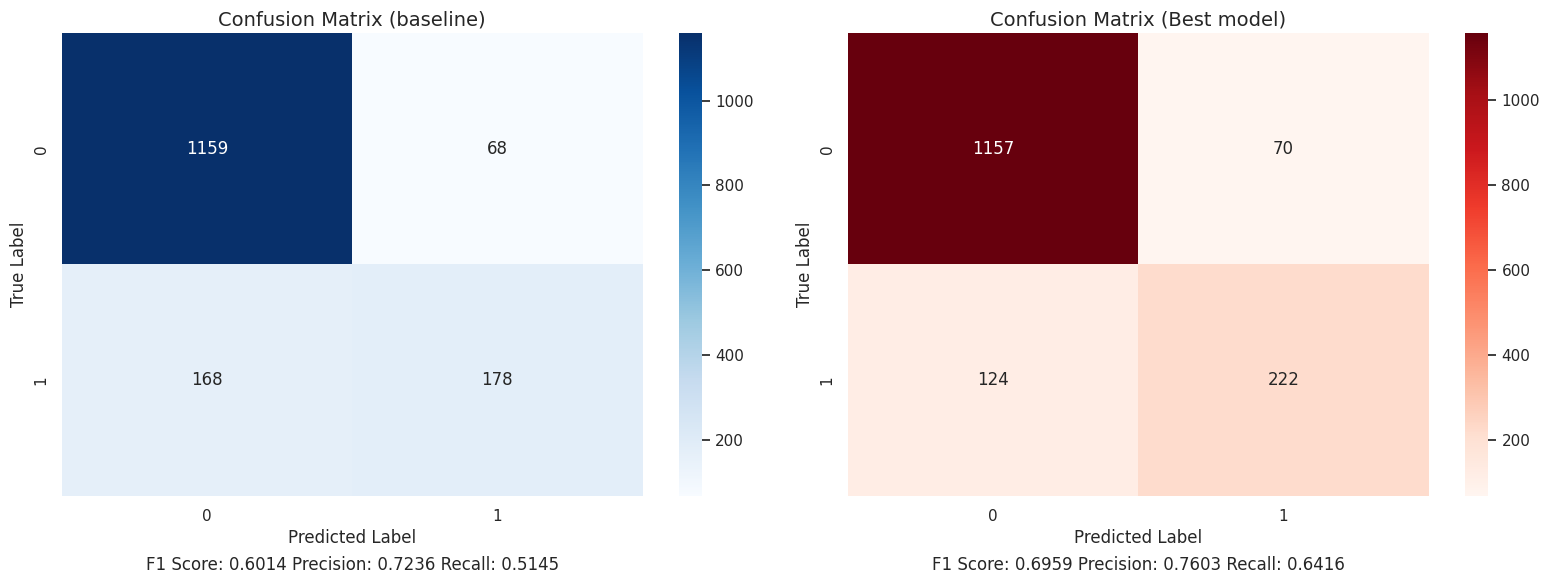

In [ ]:
########################## 문제 4-1 ##########################
########################## 코드 작성 ##########################

# baseline model
cm1 = confusion_matrix(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
precision_1 = precision_score(y_test, y_pred1)
recall_1 = recall_score(y_test, y_pred1)

# best model
cm2 = confusion_matrix(y_test, y_pred2)
f1_2 =f1_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Confusion Matrix (baseline)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)



# 두 번째 subplot : Best model
sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title('Confusion Matrix (Best model)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)

# subplot 간 간격 조절
plt.tight_layout()
plt.show()

####################################


### 문제 4-2
baseline과 bset_model에 대한 ROC Curve와 AUROC를 구하고, 두 모델의 ROC Curve를 시각화하시오.

\

---

*조건*
1. 두 모델의 ROC Curve (line)를 비교할 수 있도록 **하나의 그래프**에 시각화해야 합니다.
2. plot의 legend 안에 각 모델의 AUROC score를 출력하시오. (예시, Best model (area = 0.833))



---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 힌트) model**.predict_proba**를 사용


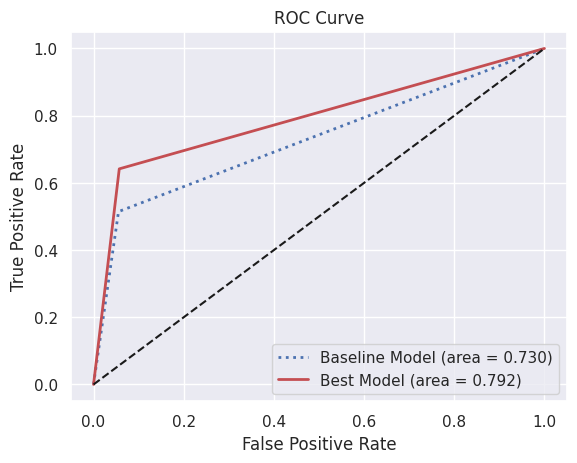

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

########################## 문제 4-2 ##########################
########################## 코드 작성 ##########################

# Baseline 모델의 ROC Curve 및 AUROC 계산
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
auroc1 = roc_auc_score(y_test,y_pred1)

# Grid Search로 찾은 Best 모델의 ROC Curve 및 AUROC 계산`
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
auroc2 = roc_auc_score(y_test, y_pred2)

# 시각화
plt.plot(fpr1, tpr1, "b:", linewidth=2, label="Baseline Model (area = {:.3f})".format(auroc1))
plt.plot(fpr2, tpr2, "r-", linewidth=2, label="Best Model (area = {:.3f})".format(auroc2))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUROC
############################################################